<font face="宋体" color=red size=5>前言 

**1.1  日常生活中的机器学习**

操作目的：输入，得到输出的可靠预测。

   收集一个包含音频样本的巨大数据集，对包含目标数据的样本和不包含目标数据的样本进行标记，使用该数据集确定“最佳参数集”，通过操作参数生成的不同的输入-输出映射。

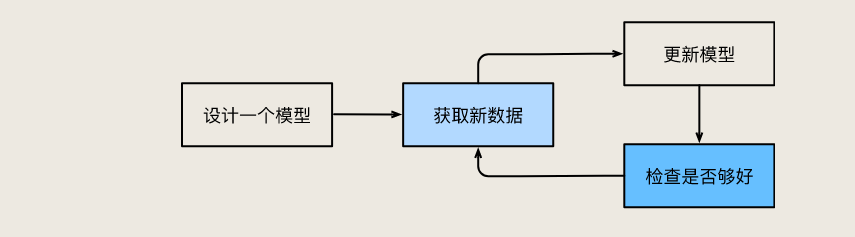

**1.2 机器学习四要素**

（1）数据：足够多，质量好（vs垃圾数据），具有代表性

（2）模型：深度学习的模型由神经网络错综复杂的交织在一起，包含层层数据转换

（3）目标函数：

  定义模型优劣程度的可优化度量，通常优化到最低点（故又名损失函数）。通常根据模型参数定义损失函数，并取决于数据集。在一个数据集上，通过最小化总损失来学习参数模型的最佳值，<font face="宋体" color=red size=2.5>拟合模型参数
    该数据集为<font face="宋体" color=red size=2.5>训练数据集，而在其表现良好的模型不一定适合其他数据集，故我们<font face="宋体" color=red size=2.5>定义测试数据集，评估拟合的模型。

（4）优化算法：
    
    梯度下降：每一步检查一个参数，仅对参数进行少量变动，看训练集损失的移动方向，旨在减少损失的方向优化参数

**1.3**

监督学习：每个样本对应“特征--标签”。 目标：生成一个模型，将任何输入特征映射到标签，即预测。

例如：输入CT肿瘤图像，预测是否为肿瘤。

步骤：
1.从大量样本中选取子集，贴标签，可能需要人工标记数据，将输入和相应的标签构成训练数据集。
2.选择有监督的算法，将训练数据集作为输入，输出一个学习模型。
3.将没见过的样本特征输入，模型的输出作为预测。

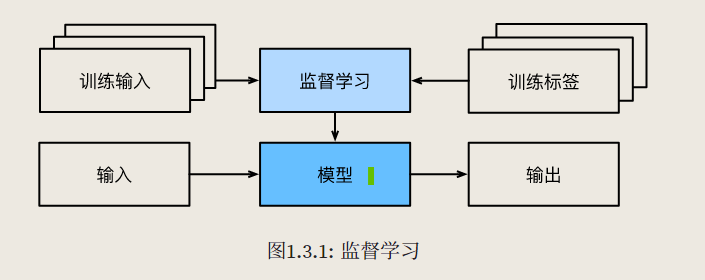

1.3.2
无监督学习：不含有目标的机器学习
+ 聚类分析
+ 主成分分析
+ 因果关系和概率图模型问题
+ 生成对抗性网络


1.3.3 强化学习

在输入、输出、模型这三者中加入环境因素，有了明确要考虑的与环境交互问题，便是强化学习的问题模式。

强化学习的目标：生成一个好的策略。“动作”受策略控制。（个人理解好的策略即获得更多奖励）

循环机制：智能体接受来自环境的观测，选择一个动作，通过某种机制将其传回环境，环境传递奖励给智能体。此后新的循环开始。

note: 1.环境不会告知哪些行为引起奖励。弄清奖励行为是一难点
      2.目前是一个好策略，是利用当前最好的策略，还是继续探索新的策略空间是一难点
      3.部分问题需要依赖之前的观测，只有部分环境可观测
      
+ 当环境可被完全观察到，此机制又称为马尔可夫决策过程
+ 状态不依赖之前的操作，改问题为上下文赌博机
+ 没有状态，只有一组未知回报的动作时，该问题为多臂赌博机

[](attachment:45a55bf5-aab1-487d-aa03-7cf8826fd18a.png)
<img src=attachment:45a55bf5-aab1-487d-aa03-7cf8826fd18a.png alt="" style="float;" width="60%" heigth="60%">
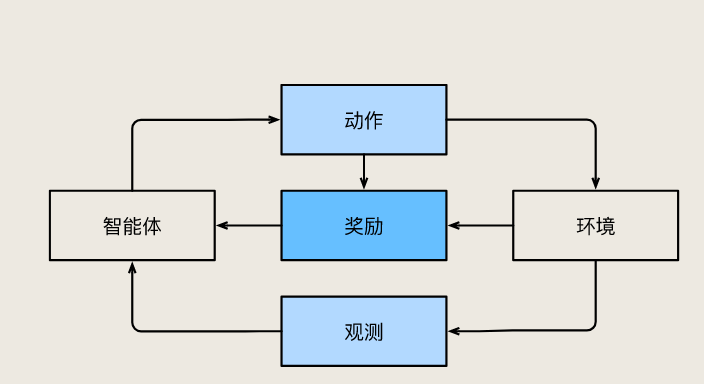

<font face="宋体" color=red size=5>预备知识

# 2.1 数据操作

n维数组：<font color=red>张量(tensor)
    
具有一个轴的张量--向量；具有两个轴的张量--矩阵

<font color=red>针对GPU设计的多维的数，与NumPy数组、向量、矩阵格式一致，可以互相转换

In [31]:
import torch

#设定随机数种子，计算机里的随机数都是伪随机的，只要设定的种子一样，初始化始终相同，更容易复现实验

torch.manual_seed(0)
torch.cuda.manual_seed(0)
print(torch.__version__)

2.1.0+cu118


## 2.2.1 创建`Tensor`

创建一个向量`Tensor`：

In [32]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

创建一个5x3的未初始化的`Tensor`：

In [34]:
x = torch.empty(5, 3)
print(x)

tensor([[-1.2904e-32,  1.3901e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


创建一个5x3的随机初始化的`Tensor`:

In [35]:
x = torch.rand(5, 3)     #每一个元素服从（0，1）均匀分布  
print(x)
y = torch.randn(5, 3)  #每一个元素服从均值为0，标准差为1的正态分布
print(y)

tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556],
        [0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939]])
tensor([[ 0.6035,  0.8110, -0.0451],
        [ 0.8797,  1.0482, -0.0445],
        [-0.7229,  2.8663, -0.5655],
        [ 0.1604, -0.0254,  1.0739],
        [ 2.2628, -0.9175, -0.2251]])


创建一个5x3的long型全0的`Tensor`:         
全1`torch.ones`

In [36]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


直接根据数据创建:

In [37]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


还可以通过现有的`Tensor`来创建，此方法会默认重用输入`Tensor`的一些属性，例如数据类型，除非自定义数据类型。

In [38]:
x = x.new_ones(5, 3, dtype=torch.float64)      # 返回的tensor默认具有相同的torch.dtype和torch.device
print(x)

#等价函数：x = torch.ones()

x = torch.randn_like(x, dtype=torch.float)    # 指定新的数据类型
print(x)                

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 2.3466, -1.1088,  1.6254],
        [ 1.2333, -0.1832, -1.3140],
        [-1.6894,  1.2525, -0.5545],
        [ 0.3019,  1.1295,  1.7179],
        [-0.8507, -0.8486, -0.1848]])


我们可以通过`shape`或者`size()`来获取`Tensor`的形状:

In [39]:
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


> 注意：返回的torch.Size其实就是一个tuple, 支持所有tuple的操作。

改变张量的形状，不改变元素值和数量，调用`reshape`函数

In [41]:
x = torch.arange(12)
X = x.reshape(3,4)            #把含有12个元素的行向量转换为矩阵

#只需指定一个维度，另一个维度自动算出。
x.reshape(-1,4)
x.reshape(3,-1)  #功能一致



tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

### 算术操作
+ 按元素运算

<font face="宋体" color=red size=2.5>前提：张量形状相同

+ 基本运算加减乘除幂次

In [7]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x-y, x * y, x / y, x ** y    

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

+ 指数运算

In [8]:
torch.exp(x)    

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

+ 连接两个张量

In [10]:
X = torch.arange(12,dtype=torch.float32).reshape((3,4))  #构造三行四列浮点数
Y = torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

torch.cat((X,Y),dim=0),torch.cat((X,Y),dim=1)  #沿行轴0连接两个张量，沿列轴1连接两个张量

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

+ 对张量所有元素求和

In [44]:
X.sum()

tensor(66)

+ 广播机制

对形状不同的张量进行操作

In [15]:
a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
a,b  #输出a:3*1, b:1*2 

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [16]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

0 0    0 1     #广播操作：a复制列，b复制行，都变成3*2矩阵，再各自相加
1 1  + 0 1
2 2    0 1

### 索引
我们还可以使用类似NumPy的索引操作来访问`Tensor`的一部分，需要注意的是：**索引出来的结果与原数据共享内存，也即修改一个，另一个会跟着修改。** 

In [54]:
x = torch.tensor([1,2,3,4])
y = x[0]
y += 1
print(y)
print(x[0]) # 源tensor也被改了

tensor(2)
tensor(2)


In [18]:
X[0:2,:] = 12  #赋值
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

+ 调用`item`函数将张量转换为python标量

In [23]:
a = torch.tensor([3.5])
a,a.item(),float(a),int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

## 2.2.4 减少运算的内存开销

In [56]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y = y + x   #该运算会分配新的内存
print(id(y) == id_before)

False


In [57]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x     #减少内存开销
print(id(y) == id_before)

True


In [58]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
torch.add(x, y, out=y) # y += x, y.add_(x)
print(id(y) == id_before)

True


## 2.2.5 `Tensor`和NumPy相互转换
**`numpy()`和`from_numpy()`这两个函数产生的`Tensor`和NumPy array实际是使用的相同的内存，改变其中一个时另一个也会改变！！！**
### `Tensor`转NumPy

In [28]:
a = torch.ones(5)
b = a.numpy()
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


### NumPy数组转`Tensor`

In [29]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


直接用`torch.tensor()`将NumPy数组转换成`Tensor`，该方法总是会进行数据拷贝，返回的`Tensor`和原来的数据不再共享内存。

In [30]:
# 用torch.tensor()转换时不会共享内存
c = torch.tensor(a)
a += 1
print(a, c)

[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)
